In [1]:
import networkx as nx

G = nx.random_k_out_graph(n=8, k=2, alpha=0.75)

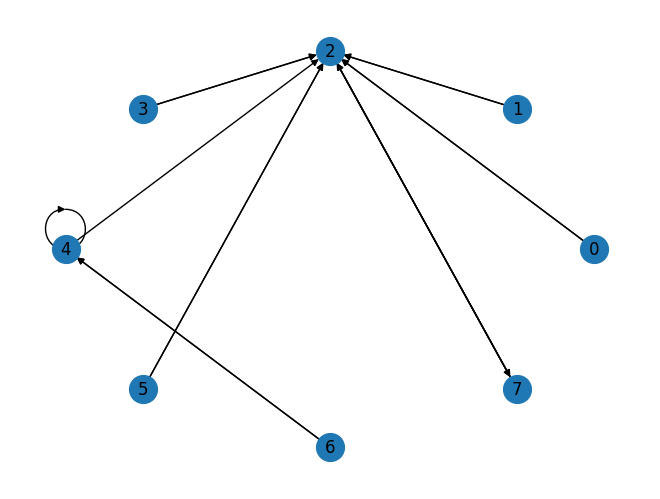

In [2]:
def draw_graph(G):
    nx.draw_circular(G, node_size=400, with_labels=True)

draw_graph(G)

In [3]:
ranks_pr = nx.pagerank(G)
ranks_pr

{0: 0.018750000000000003,
 1: 0.018750000000000003,
 2: 0.4471226514080637,
 3: 0.018750000000000003,
 4: 0.06032608695652175,
 5: 0.018750000000000003,
 6: 0.018750000000000003,
 7: 0.39880126163541435}

In [6]:
import numpy as np

def flip(p):
    return np.random.random() < p

In [7]:
from collections import Counter

def random_walk(G, alpha=0.85, iters=1000):
    counter = Counter()
    node = next(iter(G))

    for _ in range(iters):
        if flip(alpha):
            node = np.random.choice(list(G[node]))
        else:
            node = np.random.choice(list(G))

        counter[node] += 1

    total = sum(counter.values())
    for key in counter:
        counter[key] /= total
    return counter

In [8]:
ranks_rw = random_walk(G)
ranks_rw


Counter({2: 0.449,
         7: 0.396,
         4: 0.054,
         5: 0.018,
         6: 0.017,
         3: 0.02,
         1: 0.028,
         0: 0.018})

In [9]:
import pandas as pd

s1 = pd.Series(ranks_pr)
s2 = pd.Series(ranks_rw)

df = pd.DataFrame(dict(PageRank=s1, RandomWalk=s2))
df['Diff'] = df['RandomWalk'] - df['PageRank']
df*100

,PageRank,RandomWalk,Diff
0,1.875000,1.8,-0.075000
1,1.875000,2.8,0.925000
2,44.712265,44.9,0.187735
3,1.875000,2.0,0.125000
4,6.032609,5.4,-0.632609
5,1.875000,1.8,-0.075000
6,1.875000,1.7,-0.175000
7,39.880126,39.6,-0.280126
